# AOS_DM-34846 Compensable Image : update mask names

This was needed in `CompensableImage.py` , where things were called `cMask` , `pMask`, and were renamed to be `mask_comp`, `mask_pupil` , because that's how they were defined. Updated methods `getPaddedMask`, `getNonPaddedMask` that now return correctly `mask_comp` (padded) and `mask_pupil` (non-padded).


This triggered a need to change in name `test_compensableImage.py`, although here it didn't really matter which is which (i.e. as far as the test is concerned, `pMask` and `cMask` could have been used interchangeably. 

Then needed to also change `DonutStamp.py` `cMask` to `mask_pupil` (because `cMask` was treated as `non-padded`, whereas in reality it's the padded one), and same for `pMask` (--> `mask_comp` , which was needed from context). 

Also, similar change in  `test_donutStamp` as in `test_compensableImage` (just did `cMask` -- `mask_comp` , etc., since the context did not indicate that they were used the wrong way and it didn't matter for the test) ..


Finally, throughout `Algorithm.py`, the `cMask` was used as the `non-padded` one, so I changed that to `mask_pupil`, and similarly with `pMask` (treated as `padded` mask), which I updated to `mask_comp`. 

This meant that finally we do get a (slightly) different result when using FFT vs EXP, so I changed the two thresholds in `test_algorithm`

Given all these changes, I run the baseline `imgCloseLoop` to test for convergence:

Show the baseline run before `ts_wep` changes (from where refcats were updated):

In [1]:
import sys
sys.path.append('/project/scichris/aos/')
import analysisTools as at


Saved fig as 1.png


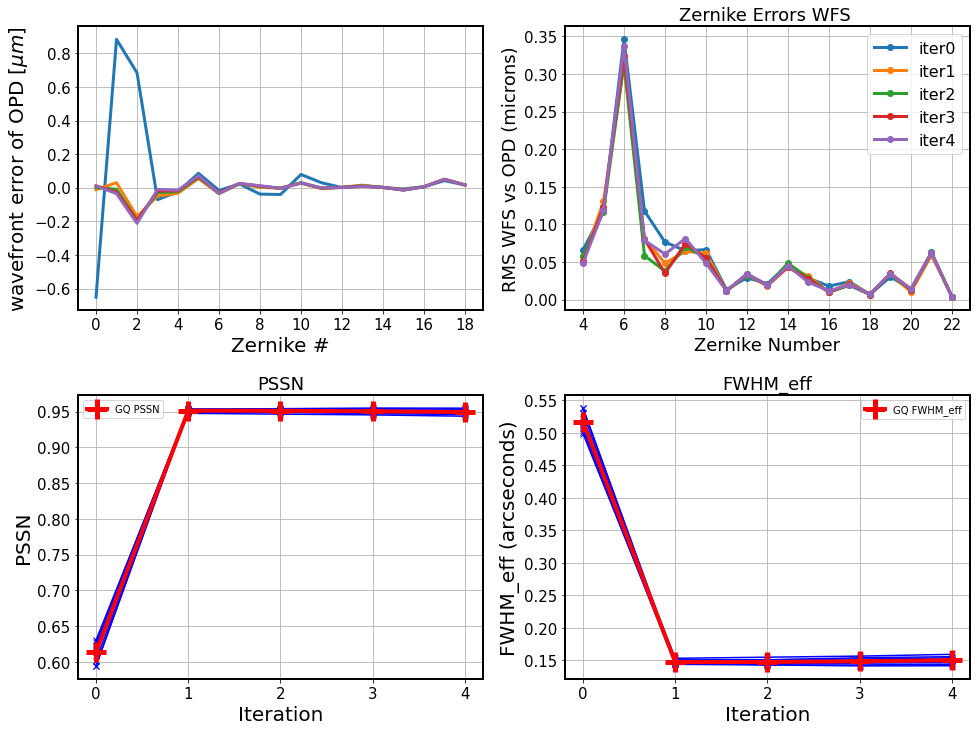

In [2]:
%matplotlib inline
at.plotIterationSummary(data_dir='/project/scichris/aos/refcats_DM-34547/imgCloseLoop2/',
                        iterNum=5
                       )

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}


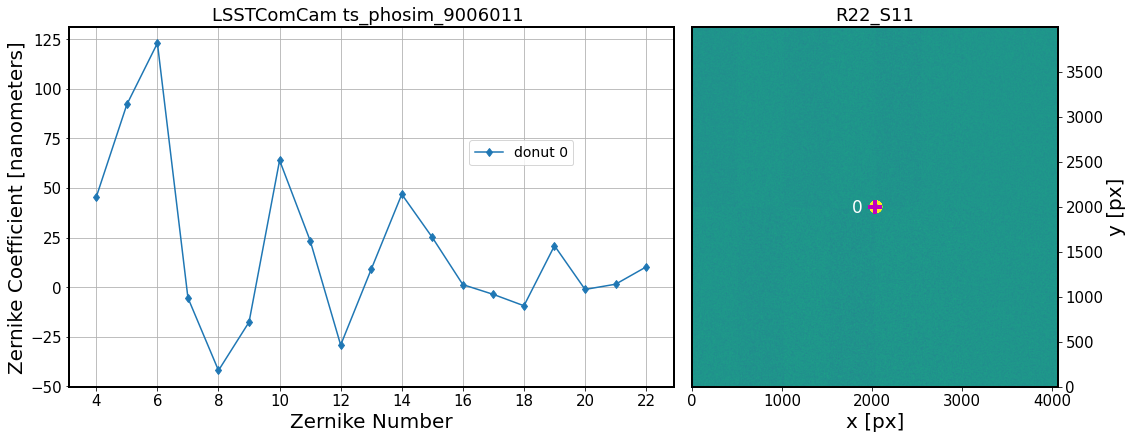

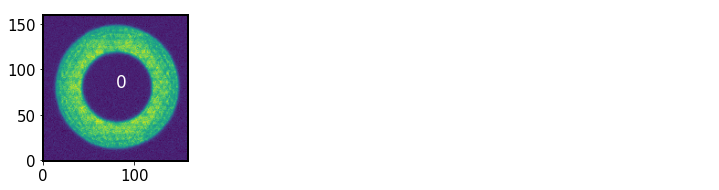

In [11]:
data_dir='/project/scichris/aos/refcats_DM-34547/imgCloseLoop2/'
import os
repoDir = os.path.join(data_dir, 'phosimData')
iterNum=1
at.plotZernikeImage(repoDir=repoDir,
                   collection=f'ts_phosim_90060{iterNum}1',
                   instrument='LSSTComCam',
                   detector='R22_S11',
                   titleAdd= '')


Plot the results of running the `imgCloseLoop` after changes in `compensableImage.py` as well as `Algorithm.py`:

Saved fig as 1.png


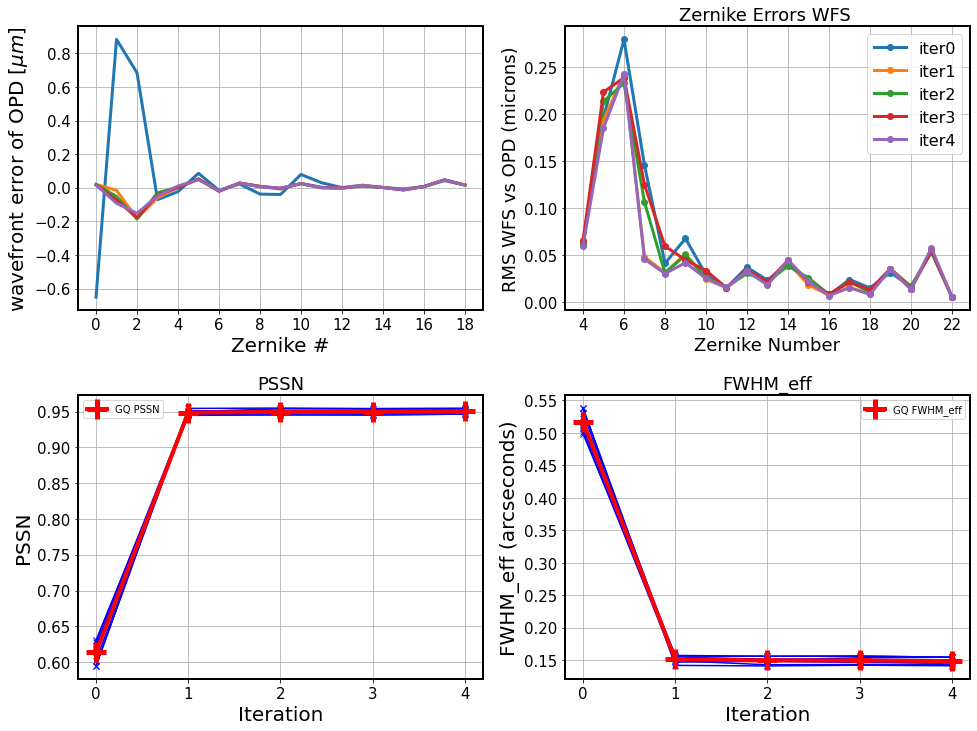

In [2]:
%matplotlib inline
at.plotIterationSummary(data_dir='/project/scichris/aos/compensable_DM-34846/imgCloseLoop/',
                        iterNum=5
                       )

Show the donut images: what do they look like

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}


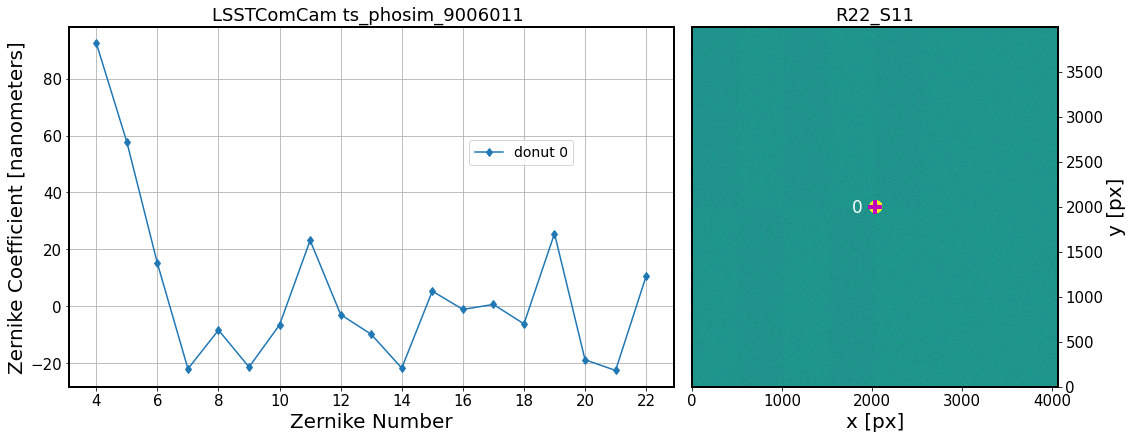

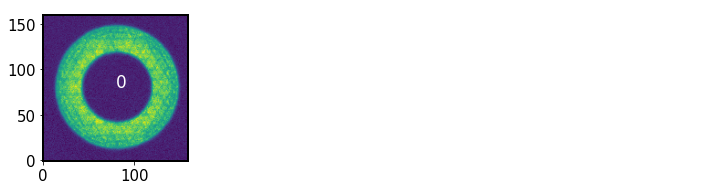

In [8]:
data_dir = '/project/scichris/aos/compensable_DM-34846/imgCloseLoop/'
import os
repoDir = os.path.join(data_dir, 'phosimData')
iterNum=1
at.plotZernikeImage(repoDir=repoDir,
                   collection=f'ts_phosim_90060{iterNum}1',
                   instrument='LSSTComCam',
                   detector='R22_S11',
                   titleAdd= '')


Also, I show in `AOS_DM-34846_CompensableImage_ts_wep` notebook that now the `mask_comp` is the padded mask, and `mask_pupil` is the non-padded mask (by changing the `boundaryT` parameter)

Lets undo all changes to `Algorithm.py`, and see if I have introduced any problems whatsoever. After all, the masks from  `compensableImage` are only accessed via `getPaddedMask` , `getNonPaddedMask` (much more descriptive than `cMask` and `pMask`,), and since I  corrected what these functions return, it should be working fine now 

First, I restore `Algorithm.py` to before changes.
    
The last commit before the first commit of the branch:  
    
    git rebase -i b672fa2b

I get 

    pick 63e473b change cMask --> mask_comp, pMask --> mask_pupil, update docstring
    pick 53a1c9f change cMask --> mask_pupil, pMask-->mask_comp, given the context
    pick 0addf74 change mask_c --> mask_pupil, mask_p --> mask_comp '
    pick eef8abd change mask_c --> mask_comp
    pick 2be8774 update algorithm test
    pick d0bc23e change pMask --> mask_comp, cMask --> mask_pupil

I edit that to

    pick 63e473b change cMask --> mask_comp, pMask --> mask_pupil, update docstring
    s 53a1c9f change cMask --> mask_pupil, pMask-->mask_comp, given the context
    s 0addf74 change mask_c --> mask_pupil, mask_p --> mask_comp '
    s eef8abd change mask_c --> mask_comp
    s 2be8774 update algorithm test
    s d0bc23e change pMask --> mask_comp, cMask --> mask_pupil
    
Then I do 

    git reset --soft HEAD~1
    git reset HEAD -- .
    
Somehow I also had to do 

    git restore --staged ../task/DonutStamp.py
    git restore --staged tests/cwfs/test_algorithm.py
    git restore --staged tests/cwfs/test_compensableImage.py
    git restore --staged tests/task/test_donutStamp.py
    
To remove everything from staged area, so that `git status` yields

    Changes not staged for commit:
      (use "git add <file>..." to update what will be committed)
      (use "git restore <file>..." to discard changes in working directory)
        modified:   python/lsst/ts/wep/cwfs/Algorithm.py
        modified:   python/lsst/ts/wep/cwfs/CompensableImage.py
        modified:   python/lsst/ts/wep/task/DonutStamp.py
        modified:   tests/cwfs/test_algorithm.py
        modified:   tests/cwfs/test_compensableImage.py
        modified:   tests/task/test_donutStamp.py


    
Now I do one by one :
    
    git add tests/task/test_donutStamp.py
    git commit -m 'update cMask, pMask in test_donutStamp'
    
    git add  tests/cwfs/test_compensableImage.py
    git commit -m 'update cMask, pMask in test_compensableImage'
    
    git add python/lsst/ts/wep/task/DonutStamp.py
    git commit -m 'update cMask, pMask in  DonutStamp'
    
    git add python/lsst/ts/wep/cwfs/CompensableImage.py
    git commit -m 'update cMask, pMask in  CompensableImage'
    
next : Algorithm and test_algorithm 
    
But I do 

    git restore python/lsst/ts/wep/cwfs/Algorithm.py
    
To see if any changes I have done messed anything up. 

I run in that state another `imgCloseLoop` baseline simulation; to `imgCloseLoop2` 



after that, do 


    mv changed_Algorithm.py Algorithm.py    

and git add Algorithm.py .... (assuming the changes I've done were good). Otherwise, can do changes in Algorithm.py more by hand ;
                               or even just do them again, and see if they agree with those changes I've done previously in changed_Algorithm.py

Saved fig as 1.png


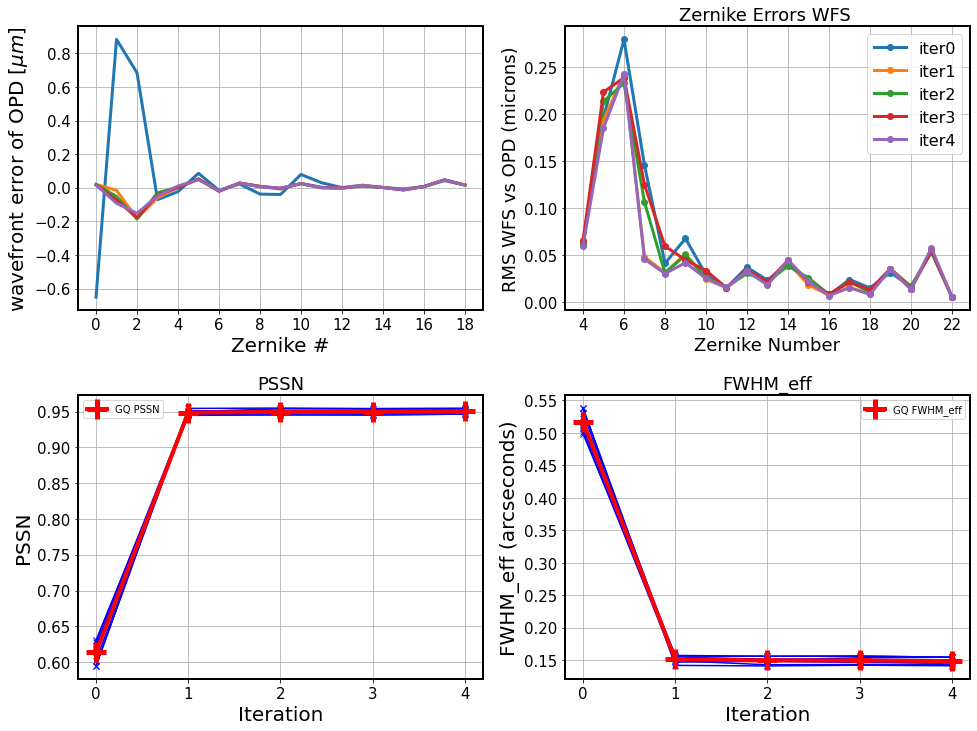

In [2]:
%matplotlib inline
at.plotIterationSummary(data_dir='/project/scichris/aos/compensable_DM-34846/imgCloseLoop2/',
                        iterNum=5
                       )

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}


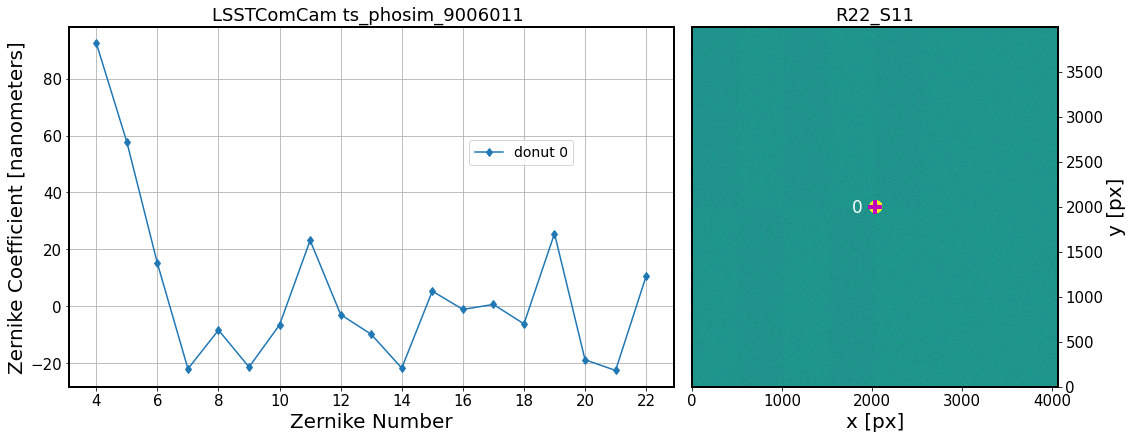

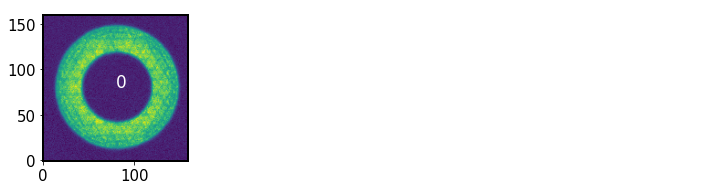

In [3]:
data_dir = '/project/scichris/aos/compensable_DM-34846/imgCloseLoop/'
import os
repoDir = os.path.join(data_dir, 'phosimData')
iterNum=1
at.plotZernikeImage(repoDir=repoDir,
                   collection=f'ts_phosim_90060{iterNum}1',
                   instrument='LSSTComCam',
                   detector='R22_S11',
                   titleAdd= '')


Compare the two (before and after changes to Algorithm.py)  - they **should** be identical since the changes are semantic (and we're using exp algorithm by default which is not using very much the padded mask). 



In [6]:
from lsst.daf import butler as dafButler
iterNum=1
collection=f'ts_phosim_90060{iterNum}1'
instrument='LSSTComCam'
detector='R22_S11'

res = {}
count = 0
for suffix in ['', 2]:
    data_dir = f'/project/scichris/aos/compensable_DM-34846/imgCloseLoop{suffix}/'
    repoDir = os.path.join(data_dir, 'phosimData')
    

    # read in the data from the butler 
    butler = dafButler.Butler(repoDir)
    registry = butler.registry

    dataId0 = dict(instrument=instrument)
    dataset = next(iter(butler.registry.queryDatasets(
                        datasetType='postISRCCD',
                        dataId=dataId0, 
                        collections=[collection]  )))

    expN = dataset.dataId["exposure"]

    # construct a dataId  for postISR 
    dataId = {'detector':detector, 'instrument':instrument,
              'exposure':expN}
    print(dataId)
    
    # read the postISR exposure 
    postIsrExp = butler.get('postISRCCD', dataId,
               collections=[collection])

    # construct a dataId for zernikes and donut catalog:
    # switch exposure to visit 
    dataId = {'detector':detector, 'instrument':instrument,
              'visit':expN}
    print(dataId)
    
    # the raw Zernikes 
    zkRaw =  butler.get('zernikeEstimateRaw', dataId=dataId,
                        collections=[collection])
    
    # store them in dic
    res[count] = zkRaw
    count += 1 

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}


In [11]:
import numpy as np 
np.sum(res[0]-res[1])

0.0

Ok, the results are bitwise identical. Good! 

Also, checked whether the `CompensableImage` after changes produces the same results as before when analyzing auxTel data - done that in `ts_analysis_notebooks/notebooks/auxtel/AOS_DM-33168_validate_AT_with_batoid.ipynb`

